In [1]:
%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm
import sys

from matplotlib.ticker import AutoMinorLocator

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.color_palette("coolwarm", 9).as_hex())
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7


In [2]:
nlons = 72
nlats = 36
grid = Spharmt(nlons,nlats,gridtype='regular',rsphere=3371e3)

tmpspec =  grid.grdtospec(np.zeros((nlats, nlons)), ntrunc=35)
print (tmpspec.size)

666


In [4]:
### Check if there is a perturbation file
### If not generate new perturbation
if glob.glob('./../model_run/dustL45_t35p0.0125/*pert.npy'):
    pert = np.load(glob.glob('./../model_run/dustL45_t35p0.0125/*pert.npy')[0])
    generatePert = False
else:
    generatePert = True

for j, filename in enumerate(sorted(glob.glob('./../model_run/dustL45_p0.005/wrfrst_d01*'))):
    if('_0037' in filename) | ('_0036' in filename) | ('_0038' in filename):
        filedir = filename
        print (filedir)
        data = Dataset(filedir, 'r+')

        if not generatePert:
            print('Looking at pert')
        else:
            print('Generating pert')

            size = int(665)
            pert = np.zeros((size))
            for i, num in enumerate(pert):
                tmp = np.random.uniform(-100,100)
                pert[i] = tmp
            np.save(j.replace('/wrfrst_d01', '/wrfrst_d01')+'_pert.npy', pert)
        
        p = 0.005 ### fraction of the generated number
        tmp = np.zeros((52, 36, 72))
        tmp2 = np.zeros((52, 36, 72))
        ### Using the same perturbation for all the same pressure level
        for i in np.arange(52):
            tmpspec =  grid.grdtospec(data.variables['T_2'][:][0,i], ntrunc=35)
            tmpspec[1:] = tmpspec[1:]*(1+p*pert)
            tmp[i] = grid.spectogrd(tmpspec)

            tmpspec =  grid.grdtospec(data.variables['T_1'][:][0,i], ntrunc=35)
            tmpspec[1:] = tmpspec[1:]*(1+p*pert)
            tmp2[i] = grid.spectogrd(tmpspec)

        ### Saving perturbations
        data.variables['T_2'][:] = tmp[np.newaxis,:,:,:]
        data.variables['T_1'][:] = tmp2[np.newaxis,:,:,:]

        data.close()

./../model_run/dustL45_p0.005/wrfrst_d01_0036-00086_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0036-00186_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0036-00286_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0036-00386_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0036-00486_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0036-00586_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00017_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00117_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00217_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00317_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00417_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00517_00_00_00
Looking at pert
./../model_run/dustL45_p0.005/wrfrst_d01_0037-00617_00_00_00
Looking at pert

[[  9.35353088   9.37185669   9.40908813 ...,   9.41270447   9.3740387
    9.35426331]
 [ 14.05760193  14.24012756  14.34507751 ...,  13.15318298  13.49661255
   13.80491638]
 [  9.68424988   9.61387634   9.62710571 ...,   9.46601868   9.68759155
    9.7401886 ]
 ..., 
 [ 18.03886414  17.71168518  17.83766174 ...,  20.01223755  19.42764282
   18.68624878]
 [ 21.86253357  22.2056427   22.42173767 ...,  20.17007446  20.81632996
   21.39299011]
 [ 18.47114563  18.39790344  18.33494568 ...,  18.74671936  18.64622498
   18.55413818]]


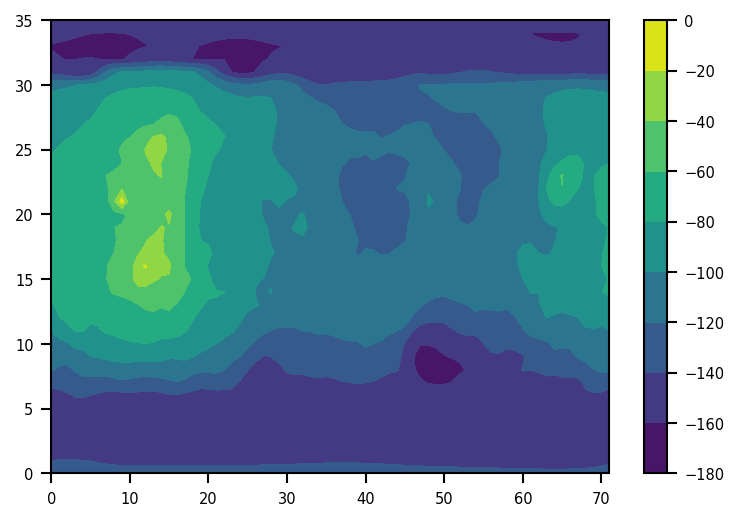

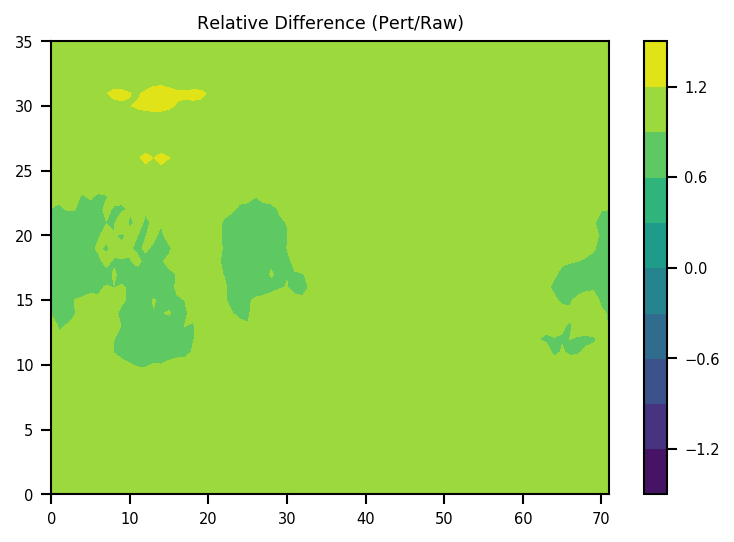

In [8]:
# print (filedir)

data = Dataset('./../model_run/dustL45/wrfrst_d01_0037-00117_00_00_00', 'a')
t2 = data.variables['T_2'][:][0,0]
data.close()

data = Dataset('./../model_run/dustL45_p0.005/wrfrst_d01_0037-00117_00_00_00', 'a')
t22 = data.variables['T_2'][:][0,0]
print (t2-t22)
data.close()

figure()
contourf(t2)
colorbar()

figure()
contourf(t22/t2, np.linspace(-1.5,1.5,11))
title('Relative Difference (Pert/Raw)')
colorbar()
# contourf(t1)


[[ 58.33033752  58.3067627   58.30438232 ...,  58.55914307  58.4630127
   58.38365173]
 [ 50.54684448  50.41722107  50.27056885 ...,  50.84432983  50.75111389
   50.65653992]
 [ 36.55506897  35.76971436  35.26016235 ...,  38.48497009  38.09715271
   37.40182495]
 ..., 
 [ 77.90314484  79.02949524  80.43652344 ...,  76.26937866  76.57138062
   77.09100342]
 [ 83.18405151  83.11129761  83.03726196 ...,  83.21986389  83.24794006
   83.23422241]
 [ 84.8038559   84.86693573  84.93559265 ...,  84.65260315  84.69628143
   84.74682617]]


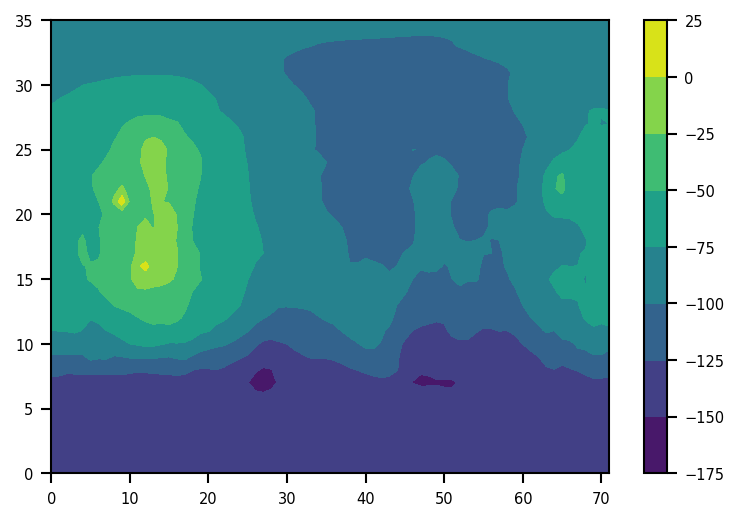

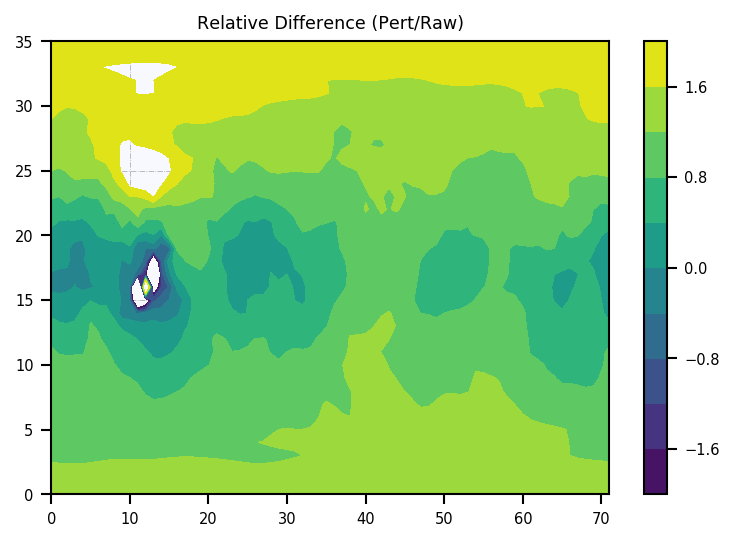

In [70]:
# print (filedir)

data = Dataset('./../model_run/wetL60/wrfrst_d01_0036-00286_00_00_00', 'a')
t2 = data.variables['T_2'][:][0,0]
data.close()

data = Dataset('./../model_run/wetL60_t35p/wrfrst_d01_0036-00286_00_00_00', 'a')
t22 = data.variables['T_2'][:][0,0]
print (t2-t22)
data.close()

figure()
contourf(t2)
colorbar()

figure()
contourf(t22/t2, np.linspace(-2,2,11))
title('Relative Difference (Pert/Raw)')
colorbar()
# contourf(t1)
